# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import joblib
import os

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [64]:
# Meload dataset
df = pd.read_csv('../obesity_classification_raw.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [65]:
# Mengecek ukuran/shape dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [66]:
# Mengecek data hilang
print("Data hilang per kolom:")
print(df.isnull().sum())

Data hilang per kolom:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


In [67]:
# Mengecek Data Duplikat
duplicate_rows = df[df.duplicated()]
print("Jumlah data duplikat:", duplicate_rows.shape[0])

Jumlah data duplikat: 24


In [68]:
# Mengecek data unik per-kolom
print("Nilai Unik per kolom:")
print(df.nunique())

Nilai Unik per kolom:
Gender               2
Age               1402
Height            1574
Weight            1525
family_history       2
FAVC                 2
FCVC               810
NCP                635
CAEC                 4
SMOKE                2
CH2O              1268
SCC                  2
FAF               1190
TUE               1129
CALC                 4
MTRANS               5
Obesity              7
dtype: int64


In [69]:
# Mengecek Informasi Dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8),

In [70]:
# Mengecek Statistik Deskriptif dataset
print("Statistik Deskriptif Dataset:")
df.describe()

Statistik Deskriptif Dataset:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [71]:
# Memisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

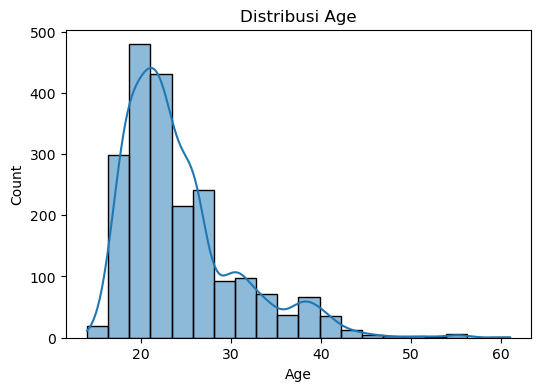

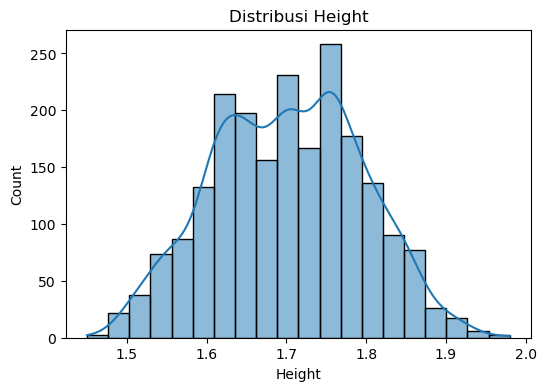

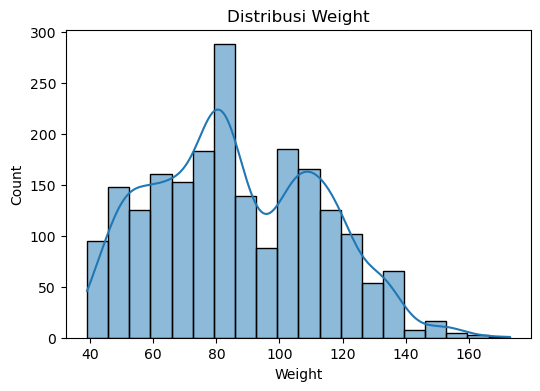

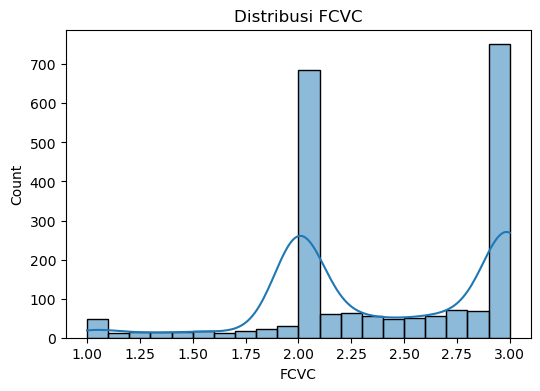

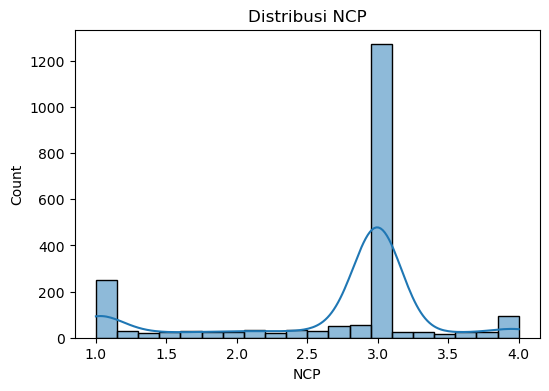

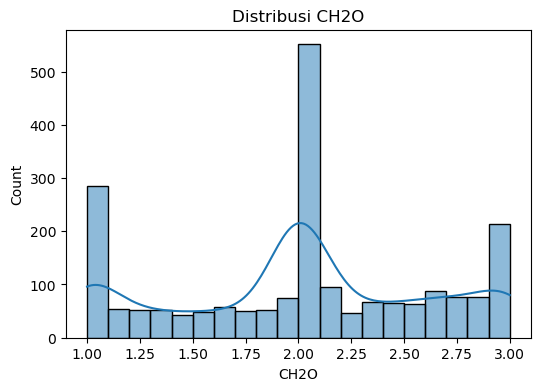

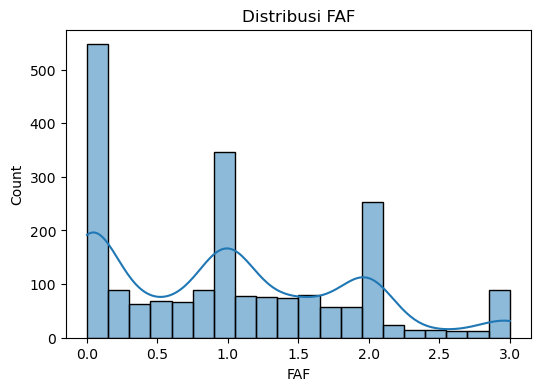

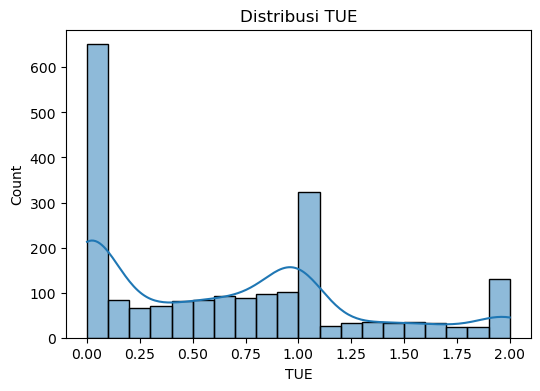

In [72]:
# Visualisasi Distribusi
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

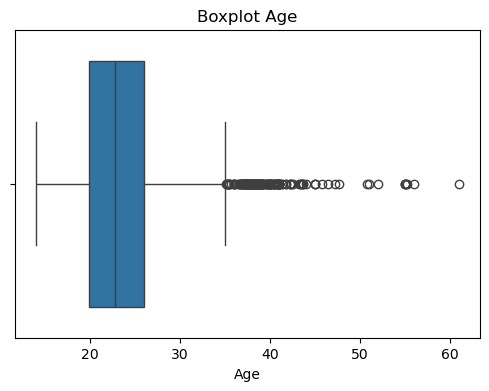

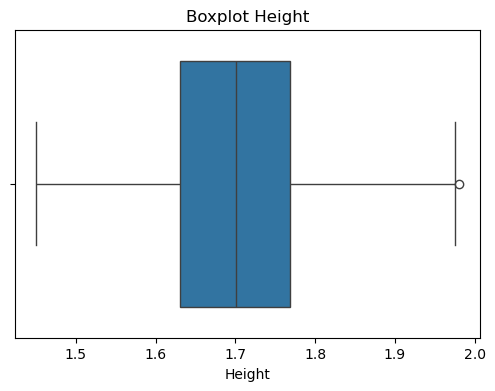

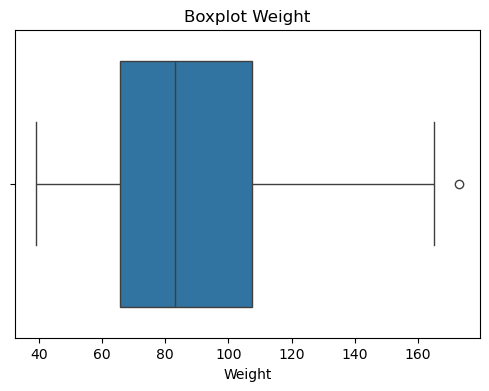

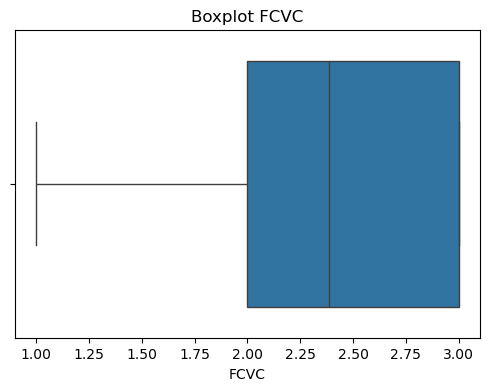

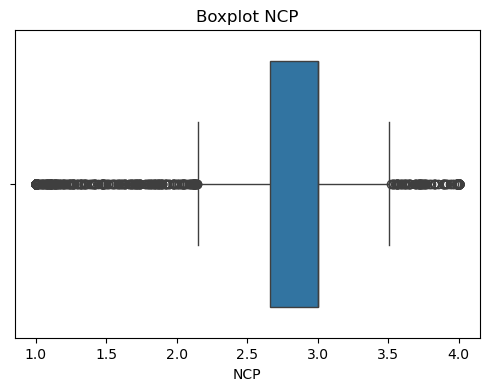

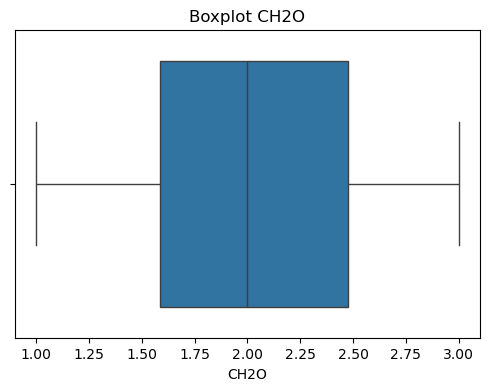

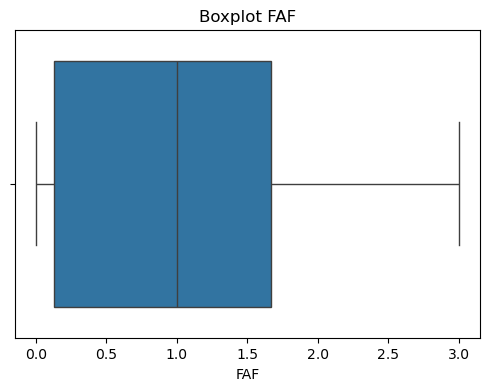

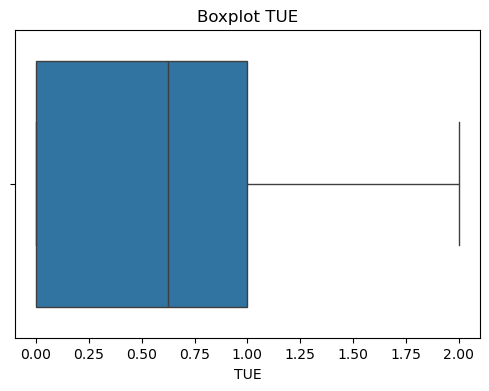

In [73]:
# Visualisasi Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

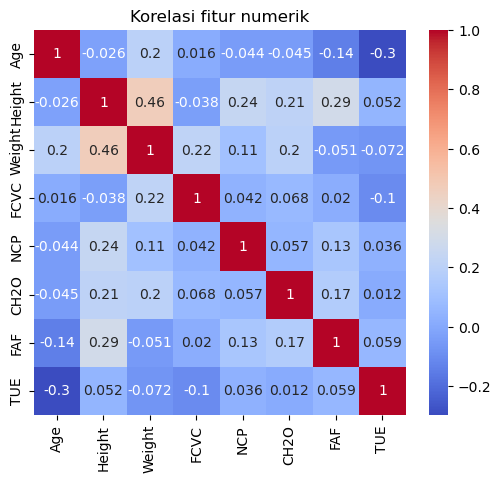

In [74]:
# Visualisasi Heatmap (Korelasi fitur numerik)
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi fitur numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [75]:
# Menghapus data Duplikat
df_cleaned = df.drop_duplicates()
df_cleaned.duplicated().sum()

0

In [76]:
# Encoder fitur kategorikal dengan LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [77]:
# Simpan Label Encoders
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [78]:
# Scaling fitur numerik dengan StandardScaler
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols)
    ],
    remainder='drop'   # kolom kategorikal sudah di-encode → tidak perlu transformer
)

In [79]:
# Simpan Scaler
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

In [80]:
# Preprocessing Data Scaling
data_scaled = preprocessor.fit_transform(df_cleaned[numerical_cols])

In [81]:
# Menggabungkan fitur kategorikal (sudah di encoder) dengan numerikal (sudah di scaling)
df_preprocessed = df_cleaned.copy()
df_preprocessed[numerical_cols] = data_scaled

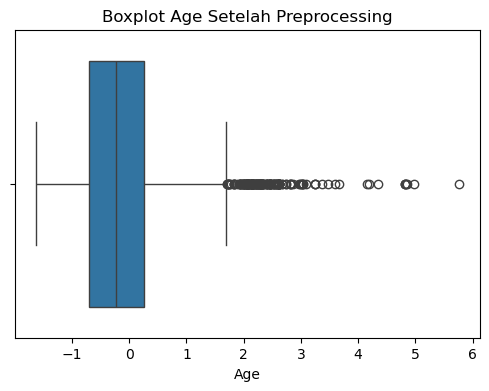

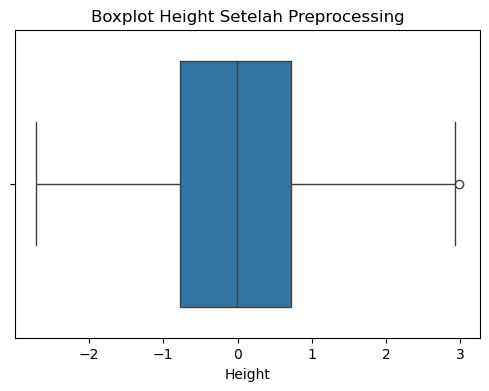

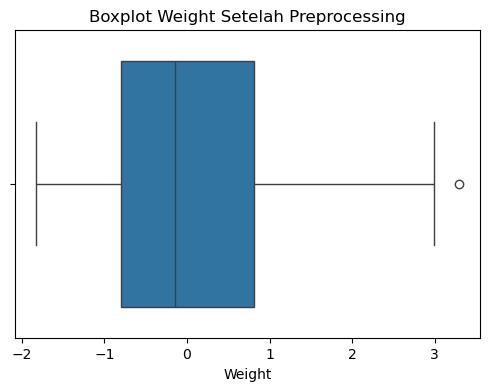

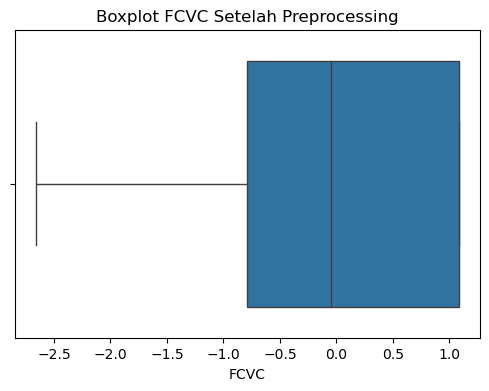

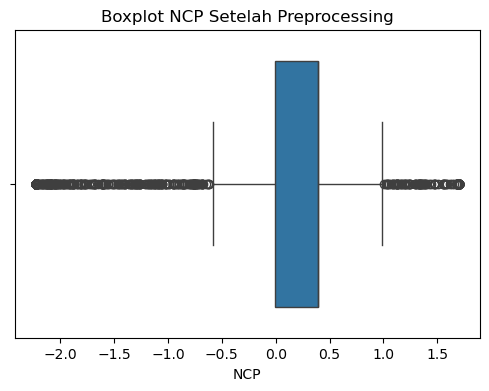

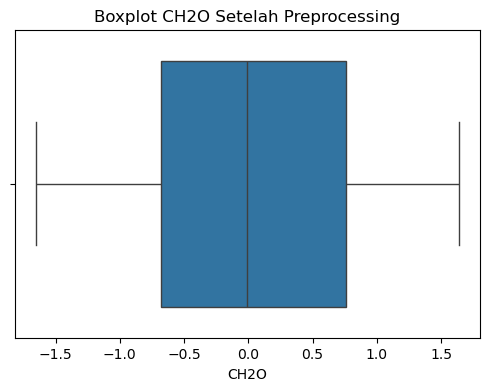

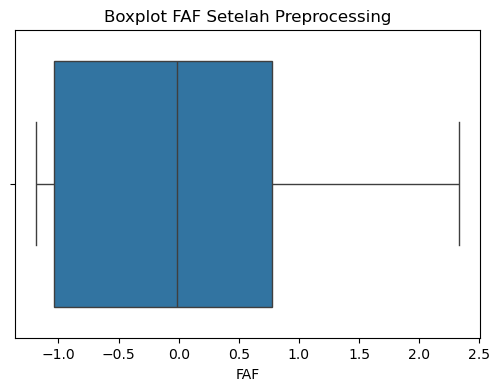

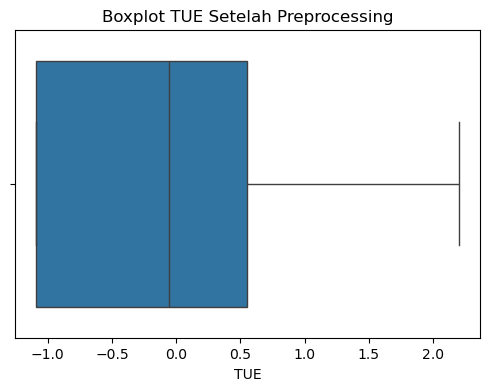

In [82]:
# Visualisasi Boxplot setelah Preprocessing
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_preprocessed[col])
    plt.title(f'Boxplot {col} Setelah Preprocessing')
    plt.show()

In [83]:
# Menampilkan 5 baris pertama
df_preprocessed.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,-0.526613,-0.887408,-0.872985,1,0,-0.788364,0.390906,2,0,-0.007810,0,-1.186977,0.554211,3,3,1
1,0,-0.526613,-1.960788,-1.178508,1,0,1.082164,0.390906,2,1,1.636552,1,2.328908,-1.090505,2,3,1
2,1,-0.212507,1.044677,-0.376509,1,0,-0.788364,0.390906,2,0,-0.007810,0,1.156947,0.554211,1,3,1
3,1,0.415705,1.044677,0.005395,0,0,1.082164,0.390906,2,0,-0.007810,0,1.156947,-1.090505,1,4,5
4,1,-0.369560,0.830001,0.112328,0,0,-0.788364,-2.225418,2,0,-0.007810,0,-1.186977,-1.090505,2,3,6
